Hi everyone! I just finished fastai's practical deep learning for coders and I am in the mood for making a dog image classifier.

If you want to make something like this as well, check [this](http://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) notebook(it is actually a more detailed version than the annotations below). If you want a video version, check [this](http://https://course.fast.ai/videos/?lesson=2).

# Installing a duckduckgo scraper and importing fastai libraries

In [1]:
pip install jmd_imagescraper;

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 49 kB 480 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=34f03ef7a1c3d78f6818bb8cb0e5a3e6148b63ec40959216e4def052dbed6bad
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14363 sha256=00c89e33e495e64fc8e27d4c3d21604b7e3c7c086c6fae72c324e0eb1cd48925
  Stored in directory: /root/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built bs4 pathlib
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

import ipywidgets as widgets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.
tensorflow-transform 1.5.0 requires pyarrow<6,>=1, but you have p

# Creating a path object that serves as a directory of our scraped images

In [3]:
path = Path().cwd()/"dogs"

In [6]:
# Scraping the 200 images of each breed
duckduckgo_search(path, "bulldog", "bulldog", max_results = 200)
duckduckgo_search(path, "shih tzu", "shih tzu", max_results = 200)
duckduckgo_search(path, "dalmatian", "dalmatian", max_results = 200)
duckduckgo_search(path, "golden retriever", "golden retriever", max_results = 200)
duckduckgo_search(path, "german shepherd", "german shepherd", max_results = 200)

Duckduckgo search: bulldog


Duckduckgo search: shih tzu


Duckduckgo search: dalmatian


Duckduckgo search: golden retriever


Duckduckgo search: german shepherd


[Path('/kaggle/working/dogs/german shepherd/001_4757e5ec.jpg'),
 Path('/kaggle/working/dogs/german shepherd/002_236ae074.jpg'),
 Path('/kaggle/working/dogs/german shepherd/003_cba60a0a.jpg'),
 Path('/kaggle/working/dogs/german shepherd/004_8f072833.jpg'),
 Path('/kaggle/working/dogs/german shepherd/005_e032e9f5.jpg'),
 Path('/kaggle/working/dogs/german shepherd/006_07971bb0.jpg'),
 Path('/kaggle/working/dogs/german shepherd/007_7c3291b0.jpg'),
 Path('/kaggle/working/dogs/german shepherd/008_674f8bfe.jpg'),
 Path('/kaggle/working/dogs/german shepherd/009_69545543.jpg'),
 Path('/kaggle/working/dogs/german shepherd/010_5400c770.jpg'),
 Path('/kaggle/working/dogs/german shepherd/011_aa95ac05.jpg'),
 Path('/kaggle/working/dogs/german shepherd/012_25d1a908.jpg'),
 Path('/kaggle/working/dogs/german shepherd/013_5690e39d.jpg'),
 Path('/kaggle/working/dogs/german shepherd/014_46248192.jpg'),
 Path('/kaggle/working/dogs/german shepherd/015_b4cd09c0.jpg'),
 Path('/kaggle/working/dogs/german sheph

In [4]:
path 

Path('/kaggle/working/dogs')

In [7]:
# Downloading and unzipping the images
lst = get_image_files(path)
lst

(#1000) [Path('/kaggle/working/dogs/golden retriever/117_a8c34fa3.jpg'),Path('/kaggle/working/dogs/golden retriever/113_987ff429.jpg'),Path('/kaggle/working/dogs/golden retriever/026_788498cf.jpg'),Path('/kaggle/working/dogs/golden retriever/043_622bb788.jpg'),Path('/kaggle/working/dogs/golden retriever/027_5a879a81.jpg'),Path('/kaggle/working/dogs/golden retriever/093_3eefacb1.jpg'),Path('/kaggle/working/dogs/golden retriever/006_5307727b.jpg'),Path('/kaggle/working/dogs/golden retriever/062_3e3099ff.jpg'),Path('/kaggle/working/dogs/golden retriever/040_bd543129.jpg'),Path('/kaggle/working/dogs/golden retriever/123_5d0b851a.jpg')...]

In [ ]:
# rm -r dogs
# uncomment this if you want to delete all of the images you scraped

In [8]:
# Checking the number of images we have
len(lst)

1000

In [9]:
# Checking for images with errors
failed = verify_images(lst)
failed

(#0) []

In [ ]:
# Removing those images with errors
failed.map(Path.unlink)

# Separating the train and valid data and checking our images

In [10]:
# Separating the test and valid data
dog = DataBlock(
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files,
            splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
            get_y = parent_label,
            item_tfms = Resize(128))

In [ ]:
# Checking the images we have and their classifications
dls = dog.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

**Uncomment this if aug_transforms() gives you an error. Apparently, you have to downgrade pytorch in Kaggle.**

More details about that [here](http://www.kaggle.com/product-feedback/279990)

In [ ]:
# pip install --user torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 torchtext==0.10.0


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


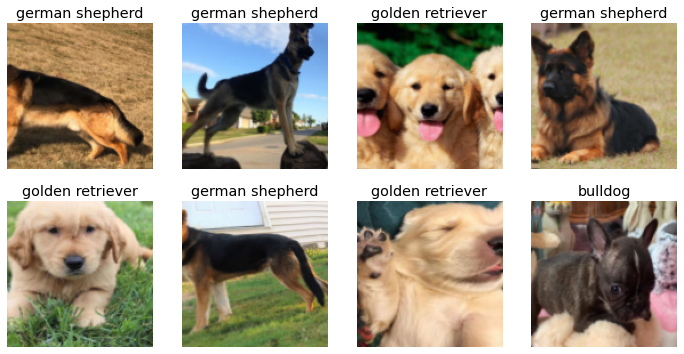

In [11]:
# Performing data augmentation where we create random variations of our input data that they appear 
# different but the meaning does not change.
dog = dog.new(
           item_tfms = RandomResizedCrop(128, min_scale = 0.5),
           batch_tfms = aug_transforms())
dls = dog.dataloaders(path)
dls.train.show_batch(max_n = 8, nrows =2)

# Training Model and Checking the Results

In [12]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Getting the best learning rate so I just won't guess it. I just pick either the slide or valley.
For the details about these four, click [here](http://forums.fast.ai/t/new-lr-finder-output/89236/3)

Click [here](http://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) if you want to gain an intuitive sense of picking a learning rate.

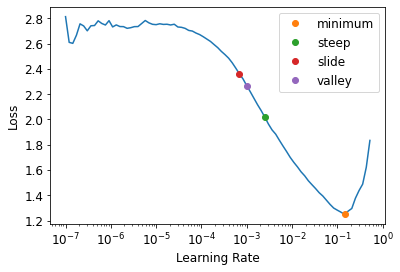

In [13]:
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(
    suggest_funcs=(minimum, steep, slide, valley))

In [14]:
print(f" minimum:{lr_min}\n steep:{lr_steep}\n slide:{lr_slide}\n valley:{lr_valley}")

 minimum:0.014454397559165954
 steep:0.002511886414140463
 slide:0.0006918309954926372
 valley:0.0010000000474974513


In [15]:
learn.fine_tune(5, 0.0006918309954926372)

epoch,train_loss,valid_loss,error_rate,time
0,1.992083,0.428108,0.140000,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.846905,0.300731,0.115000,00:41
1,0.656823,0.191660,0.070000,00:40
2,0.525817,0.174305,0.055000,00:42
3,0.416956,0.163747,0.050000,00:40
4,0.368620,0.164447,0.050000,00:41


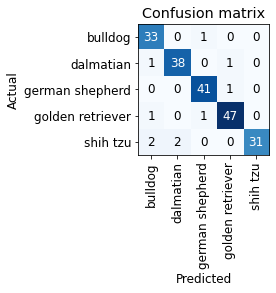

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

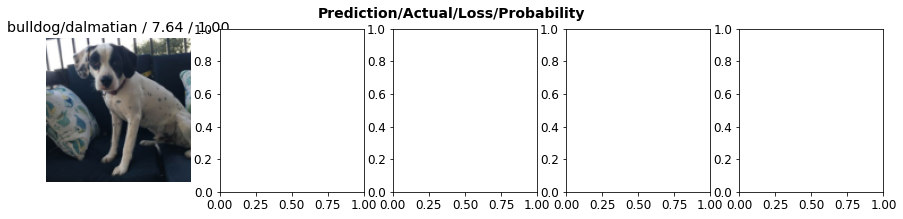

In [46]:
# Plotting the losses, I still don't know why the other 4 images don't show themeselves
interp.plot_top_losses(5, nrows = 1)


In [18]:
# This creates a GUI that shows the images where the model became confused the most. Feel free to
#delete or put in the correct classification the images
cleaner = ImageClassifierCleaner(learn)
cleaner

Uncomment the codes below to apply the changes you performed in the GUI

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Exporting the model

In [20]:
learn.export()
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

# Creating a Notebook App for the Model

**Upload Widget:** Setting up a widget where you can upload photos

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Viewing the image

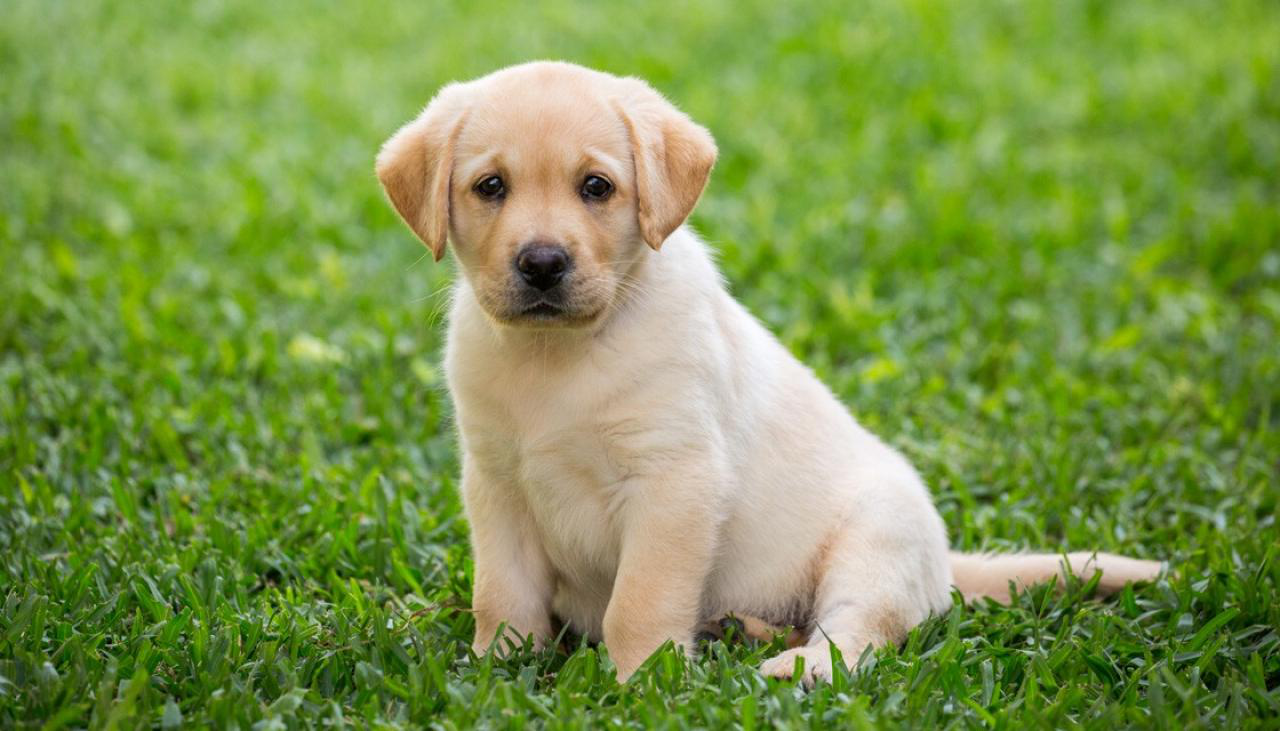

In [36]:
img = PILImage.create(btn_upload.data[-1])
img

**Output Widget:**

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uploaded image and displays it
out_pl #shows the output

Output()

Then we can get our predictions

In [38]:
learn_inf = load_learner(path/'export.pkl')

pred,pred_idx,probs = learn_inf.predict(img)

**Label Widget:** Used to display the prediction

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: golden retriever; Probability: 0.6629')

**Classify Widget**

In [40]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Creating a click event handler that is, a function that will be called when it's pressed. 

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [42]:
# Incorporating the function to the classify button
btn_run.on_click(on_click_classify)

Here is the final output. Just run this code and upload your image. You will then automatically see the dog's breed!

Note that the model learned only pictures of a bulldog, dalmatian, german shepherd, golden retriever, and a shih tzu. It will not be able to give a sensilbe answer for other breeds of dogs, hotdogs, cats, and the face of your human friend.

In [45]:
VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])